<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout13_MLR_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #13 - Part B : Multiple Linear Regression - Added Variable Plots

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Grandfather Clocks

Consider the following data from an auction site regarding the price of grandfather clocks.   Most grandfather clocks are considered to be antiques.  The goal is to understand the auction price as a function of Age and Number of Bidders.
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Age: Age of grandfather clock</li>
          <li>Number of Bidders</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1wI9yLroxTYfky6Weymd5_aO-hOJiMO_F" width="25%" height="25%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Getting the Data into COLAB

Load the tidyverse() package into this COLAB session. 

In [ ]:
#load tidyverse package
library(tidyverse)

Next, reading in the Grandfather Clocks dataset. 

In [ ]:
# Reading data in using read_csv 
 GrandfatherClocks <- read_csv("http://www.StatsClass.org/stat360/Datasets/Grandfather_Clocks.csv")

Rows: 32 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Price, Age, Number_Bidders

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a quick look at the data using head().

In [ ]:
head(GrandfatherClocks)

Price,Age,Number_Bidders
<dbl>,<dbl>,<dbl>
1235,127,13
1080,115,12
845,127,7
1522,150,9
1047,156,6
1979,182,11


## Model: $Price \sim Age + Number Bidders$

Model Conditions

*  $E(Price | Age, NumberBidders ) = \beta_{0} + \beta_{1} * Age + \beta_{2} * NumberBidders$
*  $Var(Price | Age, NumberBidders) = \sigma^2$
*  $Price$ follows a normal distribution

In [ ]:
LinearModel_Price_AgeandNumberBidders <- lm(Price ~ Age + Number_Bidders, data=GrandfatherClocks)
summary(LinearModel_Price_AgeandNumberBidders)


Call:
lm(formula = Price ~ Age + Number_Bidders, data = GrandfatherClocks)

Residuals:
   Min     1Q Median     3Q    Max 
-207.2 -117.8   16.5  102.7  213.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1336.7221   173.3561  -7.711 1.67e-08 ***
Age               12.7362     0.9024  14.114 1.60e-14 ***
Number_Bidders    85.8151     8.7058   9.857 9.14e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 133.1 on 29 degrees of freedom
Multiple R-squared:  0.8927,	Adjusted R-squared:  0.8853 
F-statistic: 120.7 on 2 and 29 DF,  p-value: 8.769e-15




---



## Correlation Matrix

In multiple linear regression, understanding the individual impact of a predictor variable is not necessarily straightforward.  The reason is that often one or more predictor variables will have an influence on other predictor variables which masks our ability to measure and understand the true individual impact of a particular predictor variable.


In [ ]:
cor(GrandfatherClocks)  #Here, the response is the left-most column in our data.frame

,Price,Age,Number_Bidders
Price,1.0000000,0.7302332,0.3946404
Age,0.7302332,1.0000000,-0.2537491
Number_Bidders,0.3946404,-0.2537491,1.0000000


The correlations presented in the top row are correlations with the response.  The remaining corrlations are correlations amonst the predictor variables. 

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1UUk9-2zdxXpGCNwT22zQoahyRUGdFeGD" width="50%" height="50%"></img></p>

Interpretation of Pearson’s Correlation Matrix

<p align='center'><img src="https://drive.google.com/uc?export=view&id=15-rCnl9tQxUx1f0qW8MSahjOmoiJTSQO" width="50%" height="50%"></img></p>


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1zYPk-hq6k25sazq5NNkoDwvALS228wd_" width="75%" height="75%"></img></p>

**Comments**

*  We want correlations between the response variable and the predictor variables (top row) to be strong -- either positive or negative

*  We want correlations amongst the predictor variables (remaining rows) to be small; this implies that each predictor is adding something unique to the model.  When a model has predictors that are strongly related to each other, mutli-collinearlity is likely present (see later handout)


## Partial Correlations - Understanding the True Impact of a Predictor Variable (Numeric)

A partial correlation can be used to measure the *true association* between two variables.  The partial correlation will remove the effect of other variables from consideration.  

<p align='center'><img src="https://drive.google.com/uc?export=view&id=10FYO538LPjYV54KULuQpFlC16m-Xnr2V" ></img></p>

Source: https://en.wikipedia.org/wiki/Partial_correlation 

A partial correlation matrix can be obtained using the pcor() function from the <strong>ppcor</strong> library in R.

In [ ]:
#Get the ppcor package
install.packages("ppcor")

In [ ]:
#Load the ppcor library
library(ppcor)

The partial correlation matrix can be obtained using the <strong>pcor()</strong> function from the ppcor library.

In [ ]:
ppcor::pcor(GrandfatherClocks)

Next, let's take look at the partial correlation matrix.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1WKM09UMB69ii8gX6S62tfCFBlVJ_urUt" width="50%" height="50%"></img></p>

**Comments**
1. The partial correlation between Price : Age is very strong (0.9343).  This implies that after the effect of NumberBidders has been taken into consideration, there is likely a considerable benefit to including Age to the model. 

2. The partial correlation between Price : NumberBidders is also very strong (0.8776).  This implies that after the effect of Age has been taken into consideration, there is substanital benefit of included the Number of Bidders in the model. 

3. The partial correlations amongst the predictor variables need not be considered here.



## Added Variable Plot - Understanding the True Impact of a Predictor Variable (Graph)

An added variable plot (sometimes called a leverage plot) can be used to investigate the true impact of a  predictor variable on a response.

Added variable plots allow us to visualize the impact of adding a particular predictor variable to the model.  This visualization requires the creation of two sets of residuals. 

Suppose the effect of the second predictor variable, say $X_2$, is being investigated. 

> **Y-Axis**: Residuals from $E(Y| X_1,  \space \space , X_3, X_4, ...)$; Variation in $Y$ that cannot be explained by the other predictors

> **X-Axis**: Residuals from $E(X_2| X_1 , X_3, X_4, ...)$; Variation in $X_2$ that is independent of other predictors, i.e..  cannot be explained by other predictors

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1JMDwC_ZpnuWm9k-iKX5ldACtk7J1FTp7" width="35%" height="35%"></img></p>

Consider the following potential added variable plots and their corresponding interpretations.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1iENIYRzpCykT0txOgKiY1czcgVYxBjWr" width="75%" height="75%"></img></p>

### Getting the Added Variable Plots via CAR package

The <strong>car</strong> package in R can be used to obtain the desired added variable plots. 

In [ ]:
#Install car package
install.packages("car")

Load the car package into the current COLAB session.

In [ ]:
#Load the car package.
library(car)

The **avPlots()** function from the car package can be used to obtain the added variable plots for our model.

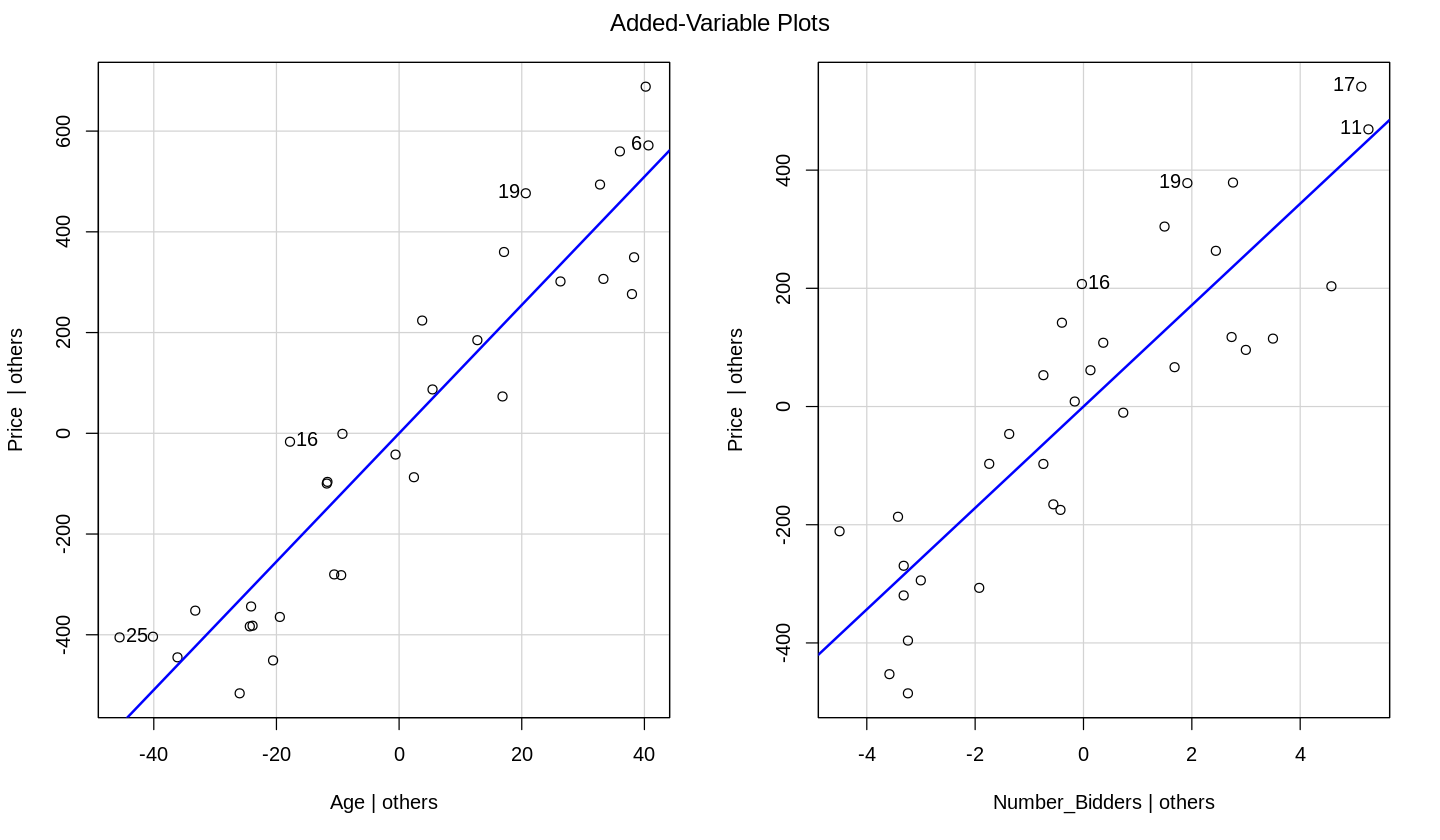

In [ ]:
#Modify size of the plotting region
options(repr.plot.width=12, repr.plot.height=7)

#Create the Added Variable Plots for the MLR Model
avPlots(LinearModel_Price_AgeandNumberBidders)

#Return size of plotting region to default setting of 7 x 7
options(repr.plot.width=7, repr.plot.height=7)



---



### Getting the Added Variable Plots in R via Brute Force

An added variable plot for $Age$ can be constructed by obtaining the following two sets of residuals and plotting them against each other.


1.   (Y-axis) Residuals from $Price \sim Number \, of \,Bidders$
2.   (X-axis) Residuals from $Age \sim Number \, of \,Bidders$



The partial correlation squared is 0.9343^2 = 0.8729

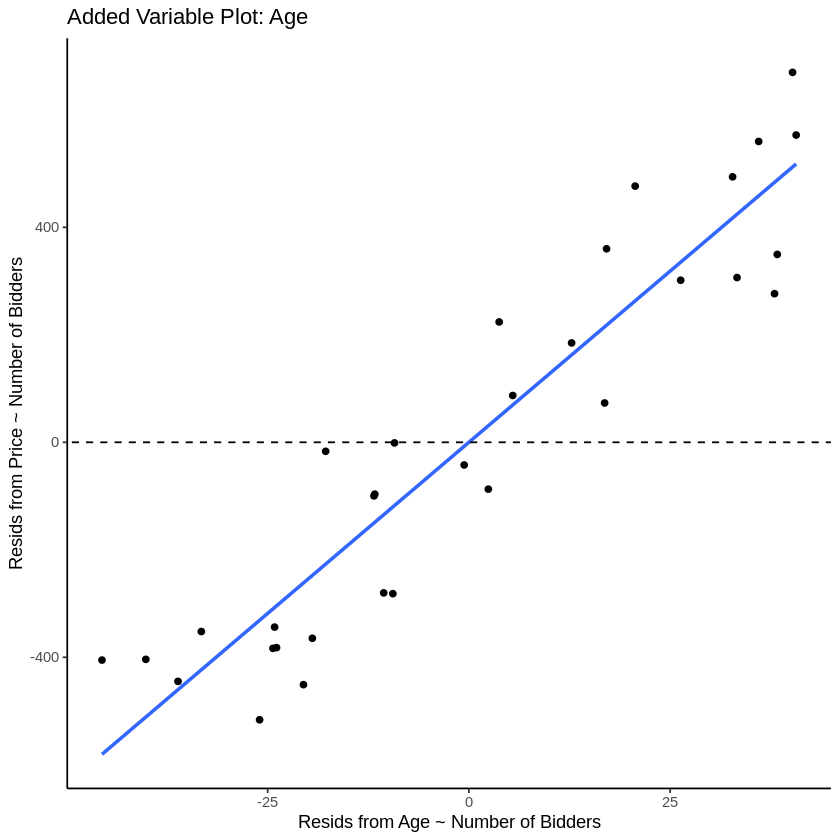

In [ ]:
#Getting an added variable plot for Age

#Getting the values for the y-axis
Resid_Price_vs_NumberBidders <- lm(Price ~ Number_Bidders, data=GrandfatherClocks)$residuals

#Getting the values for the x-axis
Resid_Age_vs_NumberBidders <- lm(Age ~ Number_Bidders, data=GrandfatherClocks)$residuals

ggplot(data=data.frame(Resid_Age_vs_NumberBidders, Resid_Price_vs_NumberBidders), aes(x=Resid_Age_vs_NumberBidders, y=Resid_Price_vs_NumberBidders)) + 
  geom_point() + 
  geom_smooth(formula = y~x, method='lm', se=FALSE) +
  geom_abline(intercept=0,slope=0, linetype="dashed") +
  labs(y="Resids from Price ~ Number of Bidders", x = "Resids from Age ~ Number of Bidders") + 
  ggtitle("Added Variable Plot: Age") + 
  theme_classic()

  #Partial Correlation Squared
  cat("The partial correlation squared is 0.9343^2 = 0.8729")

Likewise, an added variable plot for  $Number\, of \, Bidders$  can be constructed by obtaining the following two sets of residuals.

(Y-axis) Residuals from  Price∼Age 
(X-axis) Residuals from  NumberofBidders∼Age

The partial correlation squared is 0.8776^2 = 0.7701

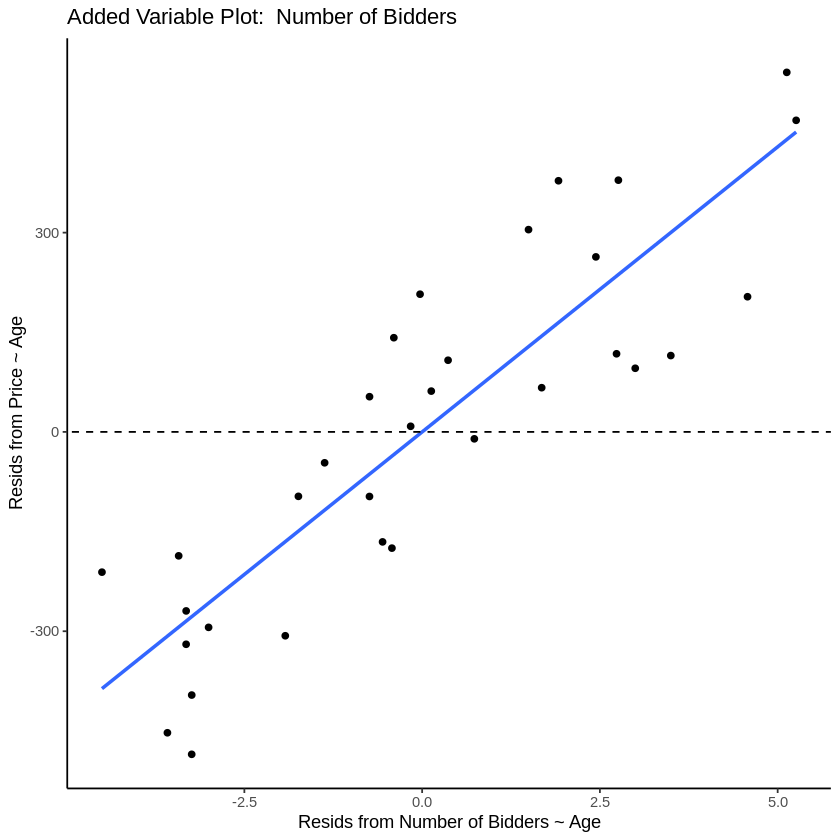

In [ ]:
#Getting an added variable plot for the Number of Bidders

#Getting the values for the y-axis
Resid_Price_vs_Age <- lm(Price ~ Age, data=GrandfatherClocks)$residuals

#Getting the values for the x-axis
Resid_NumberBidders_vs_Age <- lm(Number_Bidders ~ Age, data=GrandfatherClocks)$residuals

ggplot(data=data.frame(Resid_Price_vs_Age, Resid_NumberBidders_vs_Age), aes(x=Resid_NumberBidders_vs_Age, y=Resid_Price_vs_Age)) + 
  geom_point() + 
  geom_smooth(formula = y~x, method='lm', se=FALSE) +
  geom_abline(intercept=0,slope=0, linetype="dashed") +
  labs(y="Resids from Price ~ Age", x = "Resids from Number of Bidders ~ Age") + 
  ggtitle("Added Variable Plot:  Number of Bidders") + 
  theme_classic()

  #Partial Correlation Squared
  cat("The partial correlation squared is 0.8776^2 = 0.7701")



---



---


End of Document